# 0. Introduction

**Dataset**  
- fruits_300_data | [Download npy file](https://bit.ly/fruits_300_data)

**Environment**
- macOS `x86`cpu

**Framework**  
- TensorFlow: Version `2.10.0`

**Dependencies**  
- Python: Version `3.9.18`
- Numpy: Version `1.26.4`
- Pandas: Version `2.2.2`
- Matplotlib: Version `3.9.2`
- scikit-learn: Version `1.5.1`

**Purpose**
- 기본적인 $^*$PCA를 실습한다.  
  $^* $Principal Component Analysis(주성분 분석)

**References**  
- 혼자 공부하는 머신러닝(초판) - 박해선. 한빛미디어 pp.318-331

dimension(feature)가 커질수록(많아질수록) overfitting의 위험성이 커지고, data size도 커진다. 또한 해석 및 연산도 어려워진다.

In [5]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np

fruits = np.load('fruits_300.npy', allow_pickle=True)
fruits_2d = fruits.reshape(-1, 100*100)

--2024-10-05 13:38:39--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-10-05 13:38:40--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-10-05 13:38:40--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... c

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d) # unsupervised learning이므로, target 없음

PCA(n_components=50)

In [7]:
pca.components_.shape # PCA가 찾은 주성분
# 50은 찾은 주성분의 수, 10000은 원본 데이터의 특성 수
# 주성분도 결국 원본 데이터와 차원이 같기 때문에 이미지로 나타낼 수 있음

(50, 10000)

In [8]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr) # sample 수
    # 한 row당 이미지 10개를 그림. 따라서 rows(개수)는 n / 10
    rows = int(np.ceil(n / 10))
    # row가 한 개라면 column 수 = sample 수, 그렇지 않으면 한 row당 10개의 column으로 배치
    cols = n if rows < 2 else 10

    fig, axis = plt.subplots(rows, cols,
                             figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if ((i * 10 + j) < n):
                axis[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axis[i, j].axis('off')
    plt.show()

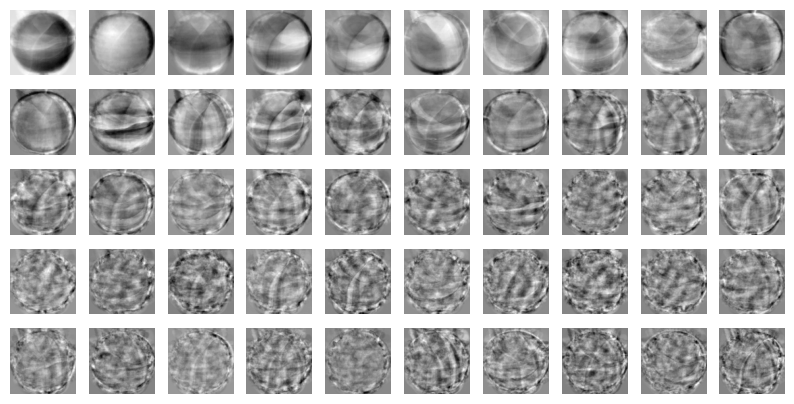

In [9]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [10]:
# 주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있음
print('원본 데이터 특성 수:', fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d) # 원본 데이터를 pca가 찾은 주성분에 투영
print('주성분으로 투영한 데이터의 특성 수:', fruits_pca.shape)

# 이제 fruits_pca는 50개의 특성을 가진 데이터이다.

원본 데이터 특성 수: (300, 10000)
주성분으로 투영한 데이터의 특성 수: (300, 50)


In [11]:
# 원본 데이터로 재구성
# 10,000개의 특성을 50개로 줄였기 때문에 어느 정도의 손실이 발생했을 것이다.
# 하지만 최대한 분산이 큰 방향(주성분)으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.
fruits_inverse = pca.inverse_transform(fruits_pca)
print('주성분으로 투영한 데이터를 재구성한 뒤의 특성 수:', fruits_inverse.shape)

주성분으로 투영한 데이터를 재구성한 뒤의 특성 수: (300, 10000)


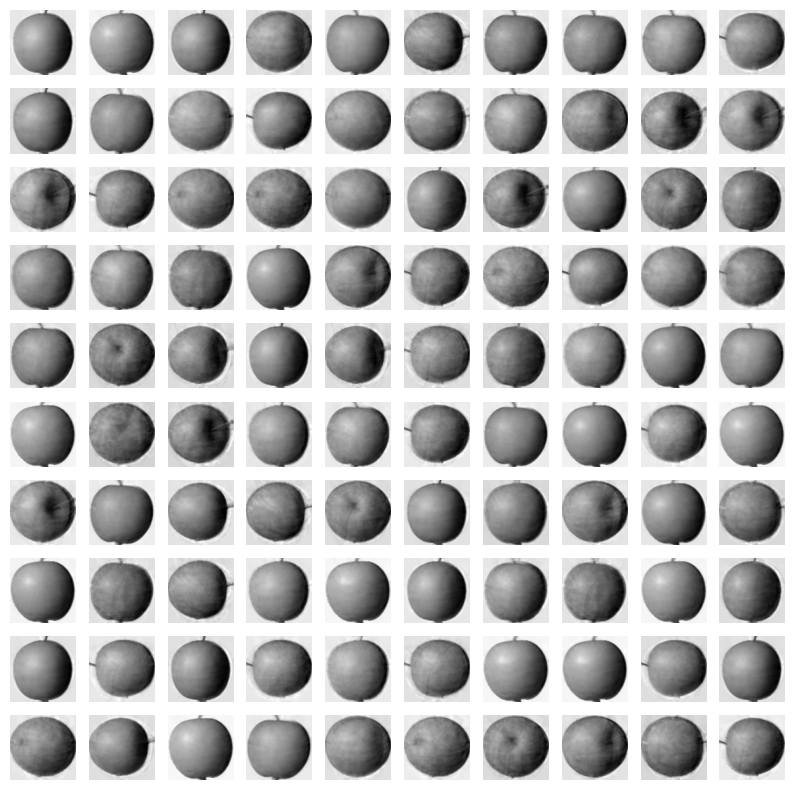

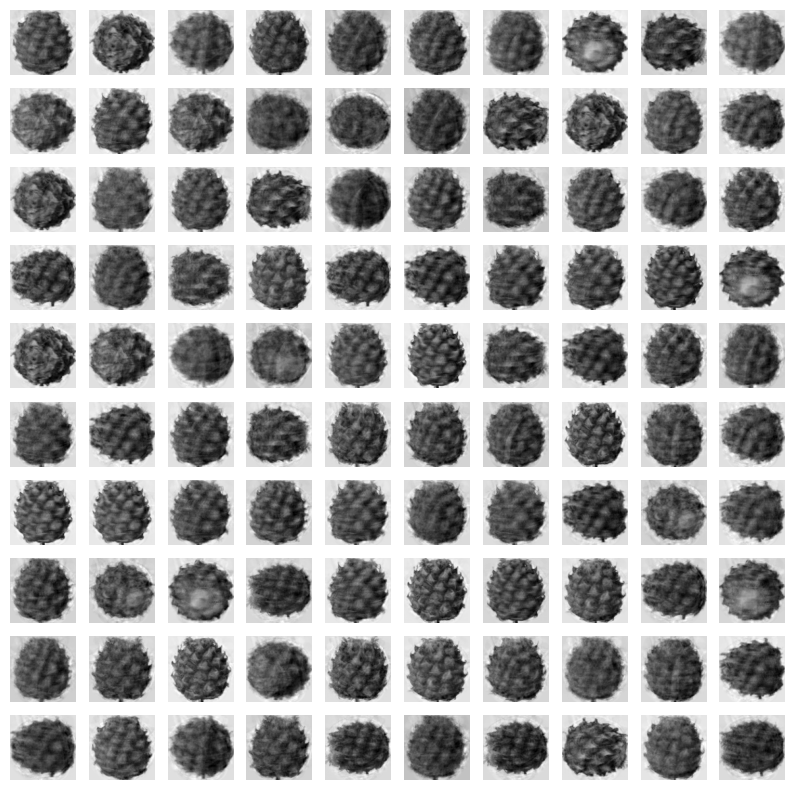

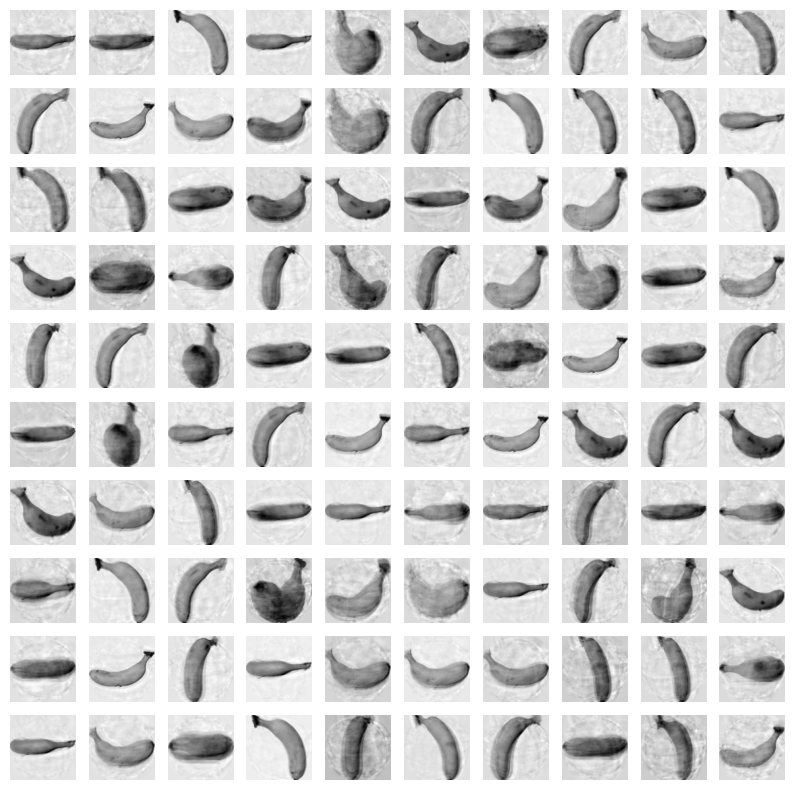

In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
# 해당 데이터는 사과, 파인애플, 바나나를 각각 100개씩 순서대로 담고 있음
for start in [0, 100, 200]: # [사과 시작점, 파인애플 시작점, 바나나 시작점]
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

# 50개의 주성분만으로 10000개의 특성을 재구성한 것치고는 매우 잘 되어있음

In [13]:
# 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 explained variance라고 한다.
# 현재 주성분(50개)이 원본 데이터의 분산을 얼마나 잘 나타내고 있는지 비율
print(np.sum(pca.explained_variance_ratio_))

# 주성분 50개만 가지고도 원본 데이터의 분산을 92% 만큼 표현할 수 있음.

0.9215123210388142


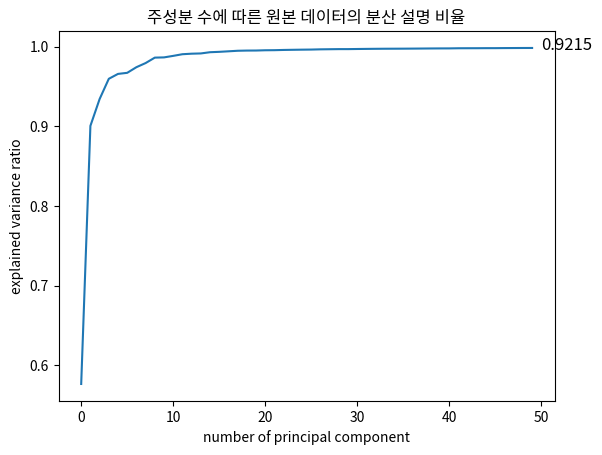

In [14]:
import matplotlib.font_manager as fm
# 한글용 폰트 설정
plt.rc('font', family='Noto Sans KR')

plt.plot(1 - pca.explained_variance_ratio_)
plt.xlabel('number of principal component')
plt.ylabel('explained variance ratio')
# plt.ylim(0.8, 1)
plt.title('주성분 수에 따른 원본 데이터의 분산 설명 비율')
# 그래프의 가장 큰 값과 그 위치
max_value = np.sum(pca.explained_variance_ratio_)
max_index = 50

# 최대값 표시
plt.text(max_index, max_value+0.07, f'{max_value:.4f}', fontsize=12, ha='left', va='bottom')
plt.show()

In [15]:
# 원본 데이터로 지도학습
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [16]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [17]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score'])) # test score
print(np.mean(scores['fit_time']))   # 각 fold 훈련에 걸린 시간

0.9966666666666667
0.19424653053283691


In [18]:
# PCA로 지도학습
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score'])) # test score
print(np.mean(scores['fit_time']))   # 각 fold 훈련에 걸린 시간

0.9966666666666667
0.00954141616821289


In [19]:
# PCA 학습법(1)
## pca = PCA(n_components=50) # -> 주성분 상위 50개 만큼 찾기

# PCA 학습법(2)
pca = PCA(n_components=0.5) # -> 주성분의 explainable ratio가 0.5가 될 때까지 주성분 찾기
pca.fit(fruits_2d)
print('explained variance ratio:', np.sum(pca.explained_variance_ratio_))
print('number of components:', pca.n_components_)

len('principal component number') # 26
len('explained variance ratio')   # 24
len('sum of ratio')               # 12

for i in range(0, pca.n_components_):
    if (i == 0): print('\nprincipal component number | explained variance ratio | sum of ratio')
    print(f'{i+1:>26} | {pca.explained_variance_ratio_[i]:<24.3f} | {np.sum(pca.explained_variance_ratio_[0:i+1]):.3f}')

explained variance ratio: 0.5229877245800597
number of components: 2

principal component number | explained variance ratio | sum of ratio
                         1 | 0.424                    | 0.424
                         2 | 0.099                    | 0.523


In [20]:
fruits_pca = pca.transform(fruits_2d) # 2개의 주성분에 투영
print(fruits_pca.shape)

(300, 2)


In [21]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score'])) # test score
print(np.mean(scores['fit_time']))   # 각 fold 훈련에 걸린 시간

# lr 모델이 완전히 수렴하지 못했으니 반복 횟수를 증가하라는 warning이 출력됨. 
# 하지만 교차 검증 성능이 좋으므로 무시 가능.

0.9933333333333334
0.018058347702026366


/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [22]:
# 차원 축소된 데이터를 클러스터링
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca) # 클러스터링도 unsupervised learning이므로 target이 존재하지 않음
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


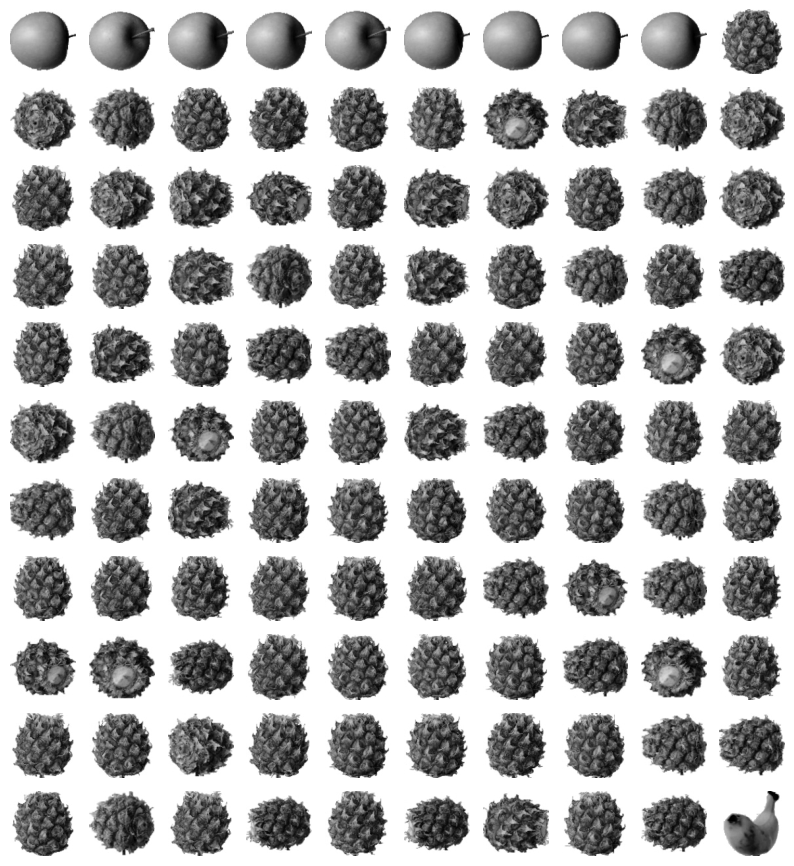

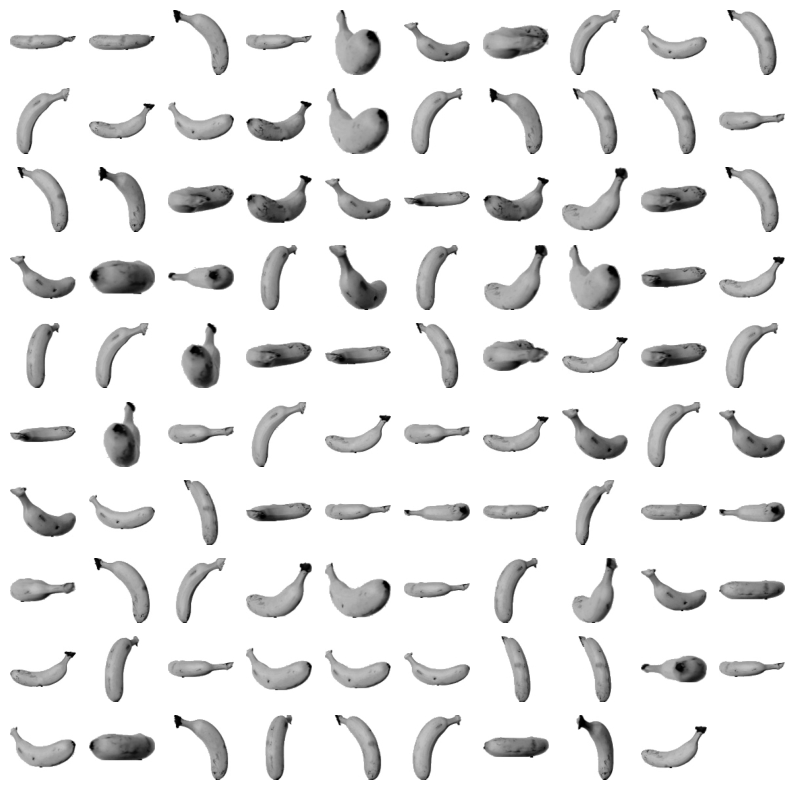

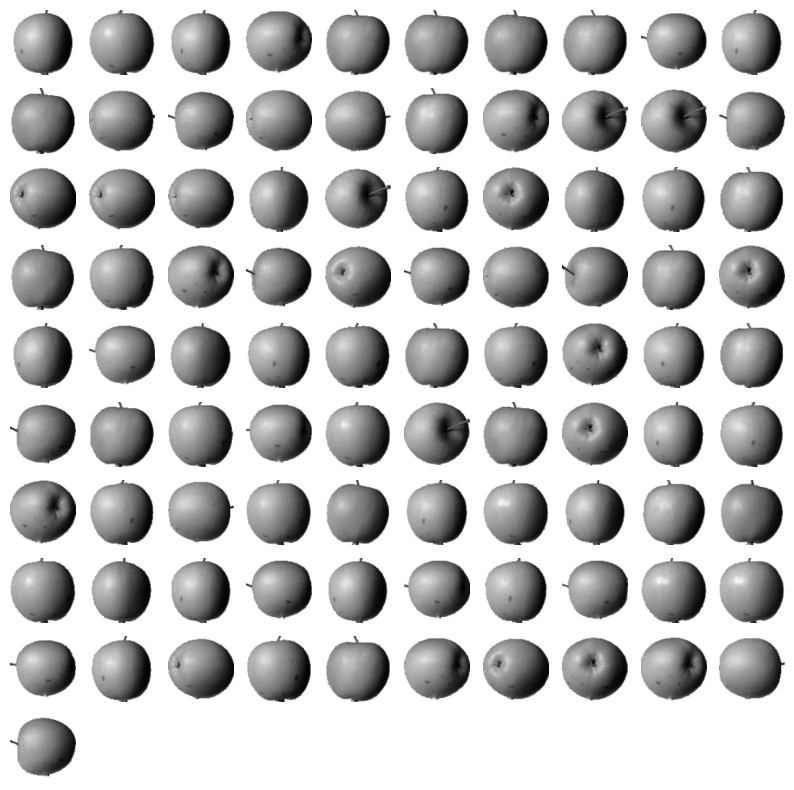

In [23]:
# 각 클러스터 확인
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Noto Sans KR.
  fig.canvas.print_figure(bytes_io, **kw)


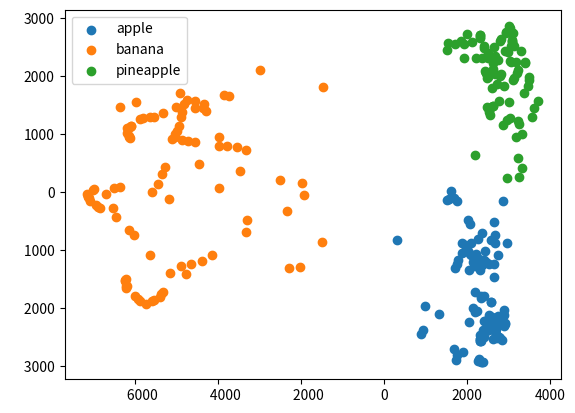

In [24]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()